### Features Explanation

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### Exploring the dataset

In [3]:
train_df.shape, test_df.shape

((177576, 23), (76104, 22))

In [4]:
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

In [5]:
train_df.head(3)

,PatientID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,42351,1,1,1,29,0,0,0,1,1,...,0,3,0,0,0,0,13,5,8,0
1,135091,1,0,1,30,0,1,2,0,0,...,0,2,0,0,0,0,9,5,6,0
2,201403,0,0,1,31,0,0,0,1,1,...,0,2,0,7,0,0,10,6,8,0


In [6]:
binary_feat = ['HighBP', 'HighChol', 'CholCheck','Smoker',
       'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost','Sex', 'Age','target']

other_features = ['Diabetes','BMI','MentHlth','GenHlth','PhysHlth','Age', 'Education', 'Income']

In [7]:
train_df[other_features].describe()

,Diabetes,BMI,MentHlth,GenHlth,PhysHlth,Age,Education,Income
count,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000,177576.000000
mean,0.298244,28.380001,3.195364,2.512597,4.252681,8.032808,5.048672,6.048233
std,0.699622,6.578401,7.426860,1.069184,8.736637,3.053915,0.986419,2.072959
min,0.000000,12.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,24.000000,0.000000,2.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,27.000000,0.000000,2.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,31.000000,2.000000,3.000000,3.000000,10.000000,6.000000,8.000000
max,2.000000,98.000000,30.000000,5.000000,30.000000,13.000000,6.000000,8.000000


### Analysis of Binary Features

In [8]:
train_df['target'].value_counts(normalize = True)

0    0.905815
1    0.094185
Name: target, dtype: float64

In [9]:
train_df.groupby('target').HighBP.value_counts(normalize = True).unstack()

HighBP,0,1
target,,
0,0.604261,0.395739
1,0.248670,0.751330


In [10]:
train_df.groupby('target').HighChol.value_counts(normalize = True).unstack()

HighChol,0,1
target,,
0,0.605007,0.394993
1,0.297937,0.702063


In [11]:
train_df.groupby('target').CholCheck.value_counts(normalize = True).unstack()

CholCheck,0,1
target,,
0,0.040572,0.959428
1,0.011360,0.988640


In [12]:
train_df.groupby('target').Smoker.value_counts(normalize = True).unstack()

Smoker,0,1
target,,
0,0.575315,0.424685
1,0.380209,0.619791


In [13]:
train_df.groupby('target').Income.value_counts(normalize = True).unstack()

Income,1,2,3,4,5,6,7,8
target,,,,,,,,
0,0.035859,0.041772,0.059204,0.076189,0.098501,0.142660,0.173309,0.372506
1,0.066009,0.092795,0.105889,0.119641,0.130942,0.153483,0.140867,0.190374


### Data Visualization

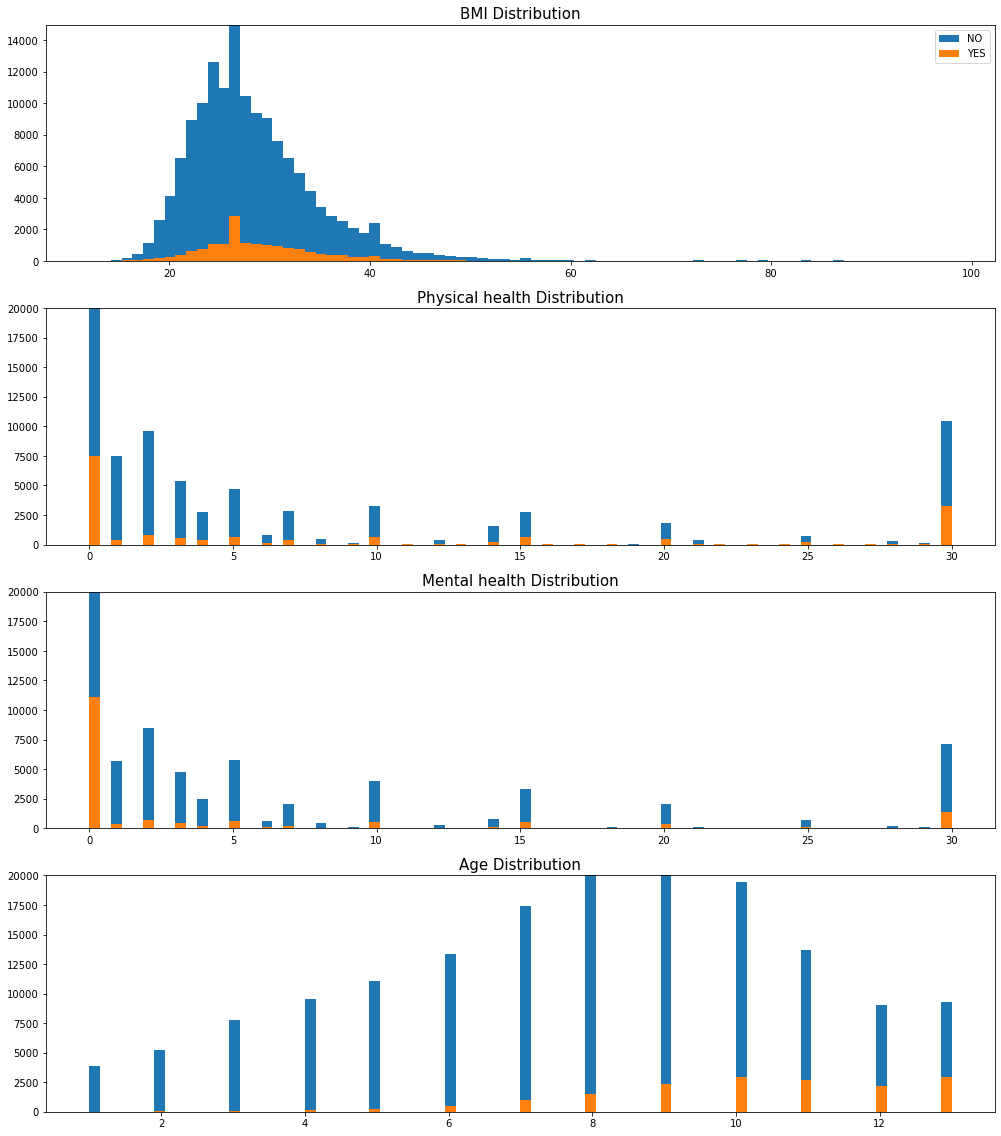

In [83]:
fig, axes = plt.subplots(ncols= 1, nrows = 4,figsize = (17,20))
axes[0].hist(train_df['BMI'][train_df['target'].eq(0)], bins = 80, label = 'NO')
axes[0].hist(train_df['BMI'][train_df['target'].eq(1)], bins = 80, label = 'YES')
axes[0].set_ylim([0, 15000])
axes[0].set_title('BMI Distribution',fontsize = 15)
axes[0].legend()

axes[1].hist(train_df['PhysHlth'][train_df['target'].eq(0)], bins = 80)
axes[1].hist(train_df['PhysHlth'][train_df['target'].eq(1)], bins = 80)
axes[1].set_ylim([0, 20000])
axes[1].set_title('Phуѕісаl hеаlth Distribution',fontsize = 15)

axes[2].hist(train_df['MentHlth'][train_df['target'].eq(0)], bins = 80)
axes[2].hist(train_df['MentHlth'][train_df['target'].eq(1)], bins = 80)
axes[2].set_ylim([0, 20000])
axes[2].set_title('Mental hеаlth Distribution',fontsize = 15)

axes[3].hist(train_df['Age'][train_df['target'].eq(0)], bins = 80)
axes[3].hist(train_df['Age'][train_df['target'].eq(1)], bins = 80)
axes[3].set_ylim([0, 20000])
axes[3].set_title('Age Distribution',fontsize = 15)

plt.show()

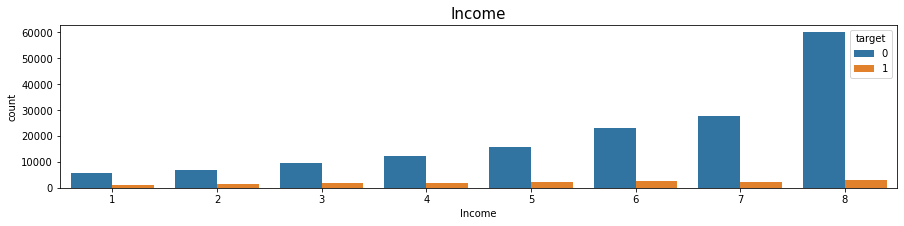

In [82]:
plt.figure(figsize = (15,3))
sns.countplot(train_df['Income'], hue = train_df['target'])
plt.title('Income',fontsize = 15)
plt.show()

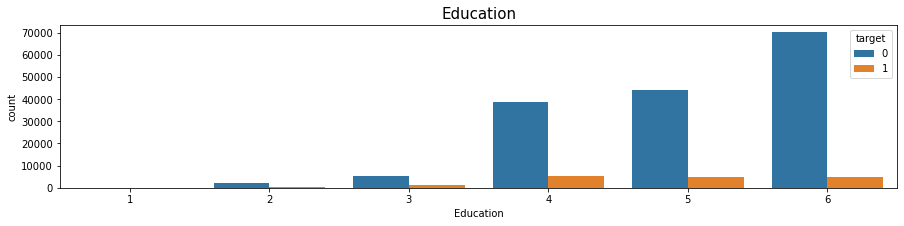

In [81]:
plt.figure(figsize = (15,3))
sns.countplot(train_df['Education'], hue = train_df['target'])
plt.title('Education',fontsize = 15)
plt.show()

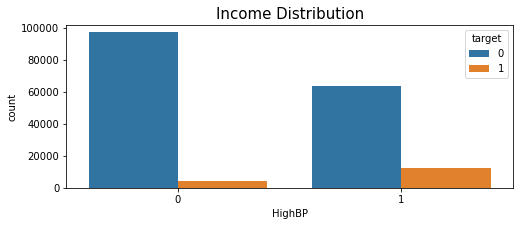

In [78]:
plt.figure(figsize = (8,3))
sns.countplot(train_df['HighBP'], hue = train_df['target'])
plt.title('Income Distribution',fontsize = 15)
plt.show()

### Boxplot

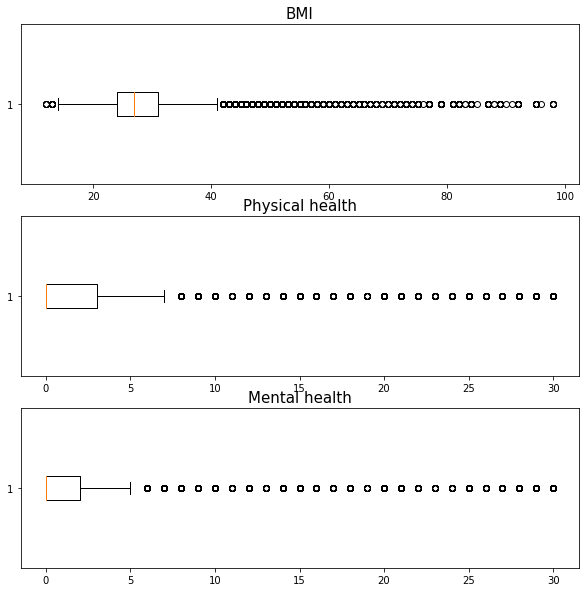

In [98]:
fig, axes = plt.subplots(ncols= 1, nrows = 3,figsize = (10,10))
axes[0].boxplot(train_df['BMI'], vert = False)
axes[0].set_title('BMI',fontsize = 15)

axes[1].boxplot(train_df['PhysHlth'], vert = False)
axes[1].set_title('Phуѕісаl hеаlth',fontsize = 15)

axes[2].boxplot(train_df['MentHlth'], vert = False)
axes[2].set_title('Mental hеаlth',fontsize = 15)

plt.show()